In [1]:
import sys
import os


sys.path.append(os.path.abspath("/Users/monika/Desktop/DP/DP_QSAR_Skin_Irritation"))
from imports import *

In [2]:
import joblib
import numpy as np
import pandas as pd
from collections import Counter
import torch
import torch.nn as nn

In [28]:
file_path = '../Features/Rabbit_SHAP.xlsx'
df = pd.read_excel(file_path)
df.head()

,BertzCT,PEOE_VSA1,HallKierAlpha,BalabanJ,PEOE_VSA6,PEOE_VSA9,MinAbsEStateIndex,EState_VSA3,VSA_EState5,MaxPartialCharge,VSA_EState8,Kappa3,EState_VSA4,Irritation
0,0.116820,0.179527,0.481670,0.374902,0.300264,0.0,0.301948,0.000000,0.464252,0.199575,0.215224,0.036325,0.407223,1
1,0.292748,0.179527,0.413389,0.396660,0.422964,0.0,0.118847,0.000000,0.467549,0.202175,0.427761,0.028416,0.331911,1
2,0.065648,0.000000,0.572033,0.335181,0.350569,0.0,0.376730,0.000000,0.464252,0.032276,0.217369,0.032218,0.000000,1
3,0.174265,0.185276,0.484583,0.473789,0.252876,0.0,0.200094,0.324527,0.485037,0.120148,0.380149,0.042150,0.333665,1
4,0.210113,0.000000,0.463808,0.357581,0.286264,0.0,0.305414,0.000000,0.488726,0.075490,0.421906,0.019772,0.226508,1


In [ ]:
file_path = '../Features/Rabbit_SHAP.xlsx'
df = pd.read_excel(file_path)
df.head()file_path_test = ''

In [29]:
X = df.drop(columns=['Irritation'])
y = df['Irritation']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)


print(f"Train set: {len(X_train)} samples")
print(f"Test set: {len(X_test)} samples")


Train set: 1424 samples
Test set: 356 samples


In [31]:
xgb_model = joblib.load("best_xgb_model.pkl")
rf_model = joblib.load("rf_model.pkl")
dt_model = joblib.load("dt_model.pkl")
knn_model = joblib.load("knn_model.pkl")
svm_model = joblib.load("svm_model.pkl")


In [32]:
def test_model(model, X, y, n_size):
    train_accuracies = []
    test_accuracies = []
    for _ in range(n_size):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

        train_prediction = model.predict(X_train)
        accuracy = accuracy_score(y_train, train_prediction)
        train_accuracies.append(accuracy)

        test_prediction = model.predict(X_test)
        accuracy = accuracy_score(y_test, test_prediction)
        test_accuracies.append(accuracy)
    
    print("Average train accuracy: ", np.mean(train_accuracies))
    print(train_accuracies)
    print("Average test accuracy: ", np.mean(test_accuracies))
    print(test_accuracies)

    x_labels = [x for x in range(1,n_size+1)]

    plt.figure(figsize=(10,5))
    plt.plot(x_labels, train_accuracies, color = "skyblue", label="Train Accuracy")
    plt.plot(x_labels, test_accuracies, color = "limegreen", label="Test Accuracy")
    plt.axhline(y=np.mean(train_accuracies), linestyle = "--", color="maroon")
    plt.axhline(y=np.mean(test_accuracies), linestyle = "--", color="pink")
    plt.legend()
    plt.show()


Average train accuracy:  0.9149344569288392
[0.9171348314606742, 0.9171348314606742, 0.9143258426966292, 0.9143258426966292, 0.9199438202247191, 0.9150280898876404, 0.9150280898876404, 0.9122191011235955, 0.9150280898876404, 0.9164325842696629, 0.9199438202247191, 0.9073033707865169, 0.9164325842696629, 0.9129213483146067, 0.9164325842696629, 0.9101123595505618, 0.9164325842696629, 0.9150280898876404, 0.9101123595505618, 0.9150280898876404, 0.9213483146067416, 0.9164325842696629, 0.9094101123595506, 0.9157303370786517, 0.9143258426966292, 0.9157303370786517, 0.9115168539325843, 0.9164325842696629, 0.9171348314606742, 0.913623595505618]
Average test accuracy:  0.9104868913857679
[0.901685393258427, 0.901685393258427, 0.9129213483146067, 0.9129213483146067, 0.8904494382022472, 0.9101123595505618, 0.9101123595505618, 0.9213483146067416, 0.9101123595505618, 0.9044943820224719, 0.8904494382022472, 0.9410112359550562, 0.9044943820224719, 0.9185393258426966, 0.9044943820224719, 0.929775280898

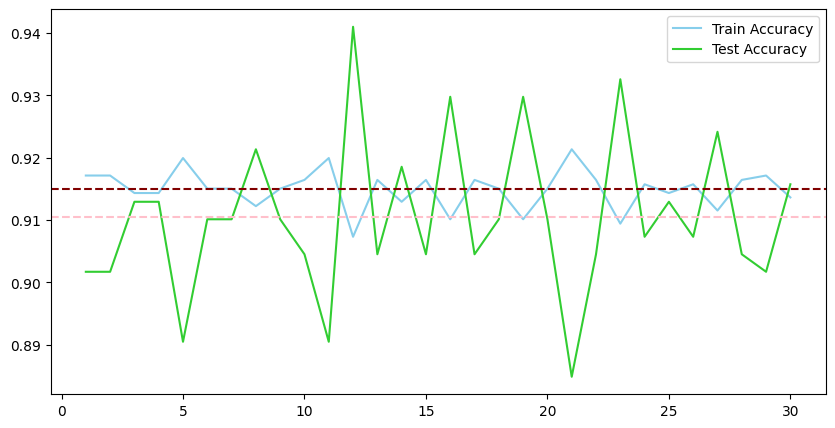

In [33]:
test_model(xgb_model, X, y, 30)